In [1]:
# Imports
import gymnasium as gym
import numpy as np
import random
from environments.grid_world import GridWorldEnv
import matplotlib.pyplot as plt

In [2]:
### Deterministic GridWorld
gym.register(
    id="gymnasium_env/GridWorld-v2",
    entry_point=GridWorldEnv,
    max_episode_steps=300,  # Prevent infinite episodes
)

In [3]:
# Environment
env = gym.make("gymnasium_env/GridWorld-v2", render_mode='rgb_array')
env.reset()
num_states = env.observation_space.n
num_actions = env.action_space.n

In [36]:
# Q-Learning Class
class QLearning:
    def __init__(self, env, num_states, num_actions):
        self.env = env
        self.num_states = num_states
        self.num_actions = num_actions
        self.Q = np.zeros((self.num_states, self.num_actions))
        self.policy = {state: 0 for state in range(self.num_states)}

    def select_action(self, state, epsilon=.1):
        if np.random.randn() < epsilon:
            return np.random.choice(self.num_actions)
        return np.argmax(self.Q[state])

    def update_q_table(self, state, action, reward, next_state, alpha=.01, gamma=.9):
        old_q_value = self.Q[state, action]
        new_q_value = np.max(self.Q[next_state]) # Off-policy
        self.Q[state, action] = old_q_value + alpha * (reward + gamma * new_q_value - old_q_value)
        
    def get_policy(self):
        for state in range(self.num_states):
            self.policy[state] = np.argmax(self.Q[state]) # Action with the highest Q-value

    def train(self, num_episodes=1000):
        for _ in range(num_episodes):
            state, _ = env.reset()
            terminated = False
            while not terminated:
                action = self.select_action(state)
                next_state, reward, terminated, _, _ = env.step(action)
                self.update_q_table(state, action, reward, next_state)
                state = next_state

    def evaluate(self, num_episodes=1):
        self.get_policy()
        episode_total_reward = 0
        for _ in range(num_episodes):
            state, _ = env.reset()
            terminated = False
            while not terminated:
                action = self.policy[state] # Take best action based on learned policy
                next_state, reward, terminated, _, _ = env.step(action)
                state = next_state
                episode_total_reward += reward
            print(f"Total collected rewards: {episode_total_reward}")

In [37]:
q_learning = QLearning(env, num_states, num_actions)
q_learning.train()

In [38]:
q_learning.evaluate()

Total collected rewards: 3.0


In [39]:
q_learning.policy

{0: np.int64(2),
 1: np.int64(2),
 2: np.int64(2),
 3: np.int64(2),
 4: np.int64(2),
 5: np.int64(2),
 6: np.int64(2),
 7: np.int64(2),
 8: np.int64(2),
 9: np.int64(2),
 10: np.int64(1),
 11: np.int64(1),
 12: np.int64(2),
 13: np.int64(2),
 14: np.int64(2),
 15: np.int64(1),
 16: np.int64(1),
 17: np.int64(2),
 18: np.int64(2),
 19: np.int64(2),
 20: np.int64(1),
 21: np.int64(1),
 22: np.int64(1),
 23: np.int64(1),
 24: np.int64(0)}

In [40]:
q_learning.Q

array([[-3.07545661, -2.74208243, -2.32501016, -3.06804978],
       [-2.2290563 , -2.10158801, -1.78971571, -2.47875973],
       [-1.57870344, -1.50416621, -1.18322358, -1.75890809],
       [-1.08277392, -1.07089145, -1.03311659, -1.06809662],
       [-0.81101917, -0.82703497, -0.74573857, -0.788159  ],
       [-2.70150942, -1.87348483, -1.11142042, -2.2697346 ],
       [-1.97950734, -1.25022651, -0.02410965, -1.98410472],
       [-1.45460747, -1.07893733,  1.16698269, -1.43644536],
       [-0.871549  , -0.69207082,  0.30774339, -0.80982727],
       [-0.60654205, -0.48553665,  0.42531486, -0.4779321 ],
       [-1.97287878,  0.4821954 , -1.33003948, -1.43288842],
       [-1.50202814,  2.31894587,  0.2321316 , -1.35938029],
       [-0.86936381,  0.79020088,  4.24363169, -0.59160647],
       [-0.61171412,  0.21382036,  4.00641104,  0.05960258],
       [-0.41086613,  0.09413921,  3.49654589, -0.0936416 ],
       [-1.08513265,  0.51543488, -0.94666905, -1.04654276],
       [-0.59532399,  3.

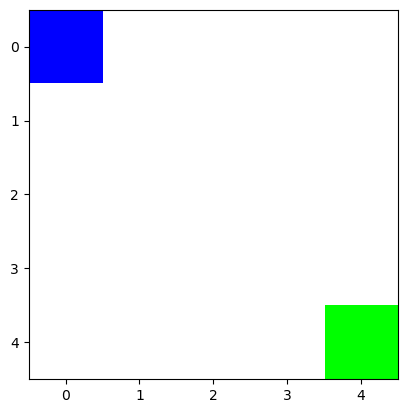

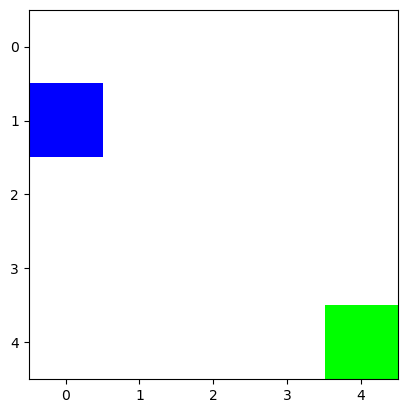

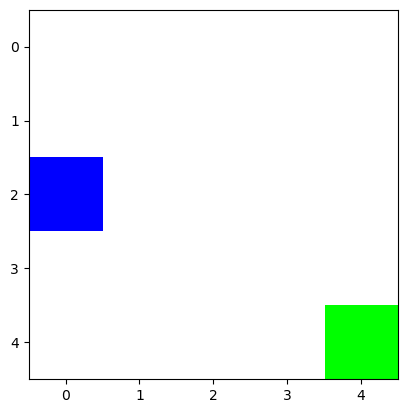

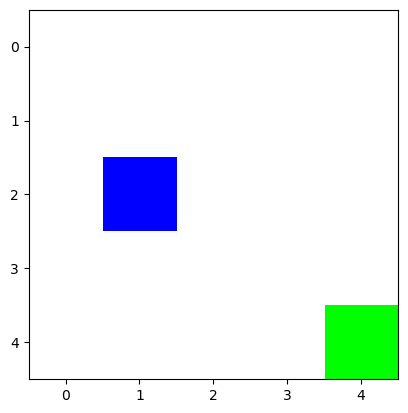

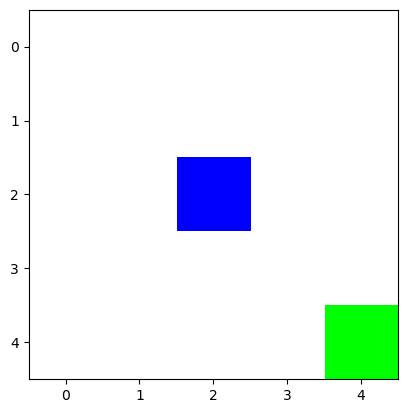

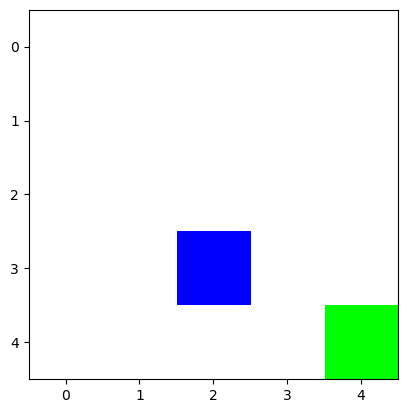

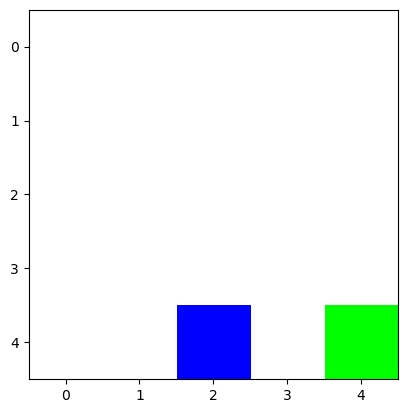

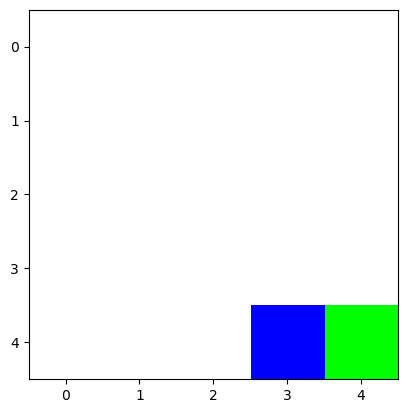

<Figure size 640x480 with 0 Axes>

In [41]:
def simulate_policy(env, policy, pause=0.5):
    state, _ = env.reset()

    done = False
    while not done:
        # Render
        img = env.render()
        if img is not None:
            plt.imshow(img)
            plt.axis('on')
            plt.show(block=False)
            plt.pause(pause)
            plt.clf()

        # Take action from policy
        action = policy[state]
        state, reward, done, _, _ = env.step(action)

simulate_policy(env, q_learning.policy, pause=0.7)

In [42]:
# Visualise the Value Function
def visualize_value_function(agent, agent_name="PI", env_size=5):
    """
    Display the state values as a heatmap.
    """
    plt.figure(figsize=(8, 6))
    
    # Populate the value grid with state values
    value_grid = np.array([np.max(agent.Q[state]) for state in range(num_states)]).reshape(env_size, env_size)
    
    # Create the heatmap visualization
    plt.imshow(value_grid, cmap='viridis')
    plt.colorbar(label='State Value')
    plt.title('Learned State Values')
    
    # Add value text in each cell for precision
    for row in range(env_size):
        for col in range(env_size):
            value = value_grid[row, col]
            text_color = "white" if value < 0.5 * np.max(value_grid) else "black"
            plt.text(col, row, f"{value:.2f}",
                     ha="center", va="center", color=text_color)
    plt.show()
    plt.savefig(f"visualisations/{agent_name}_value_function.png")
    plt.close()
    print("Value function visualisation saved")

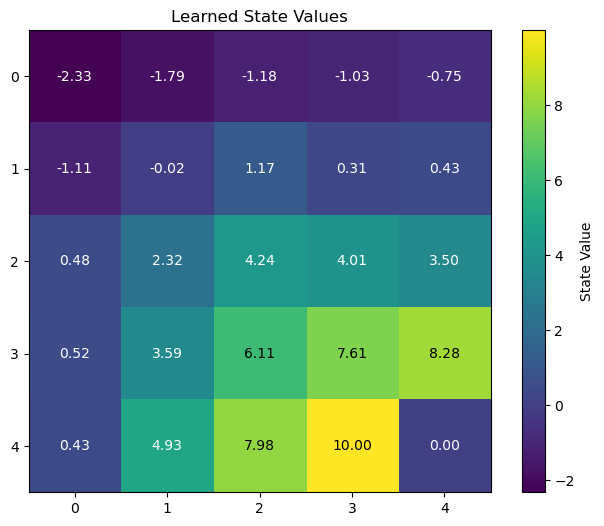

Value function visualisation saved


In [43]:
visualize_value_function(q_learning, agent_name="Q-Learning")